In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bleach.html5lib_shim import match_entity
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier


In [20]:
g

# load the dataset
data = load_breast_cancer()

# create DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# add target column
df['target'] = data.target

print(df.head())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [19]:
g matches = pd.read_csv('matches.csv')
deliver = pd.read_csv('deliveries.csv')
print(matches.head())
print(deliver.head())

       id   season        city        date match_type player_of_match  \
0  335982  2007/08   Bangalore  2008-04-18     League     BB McCullum   
1  335983  2007/08  Chandigarh  2008-04-19     League      MEK Hussey   
2  335984  2007/08       Delhi  2008-04-19     League     MF Maharoof   
3  335985  2007/08      Mumbai  2008-04-20     League      MV Boucher   
4  335986  2007/08     Kolkata  2008-04-20     League       DJ Hussey   

                                        venue                        team1  \
0                       M Chinnaswamy Stadium  Royal Challengers Bangalore   
1  Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
2                            Feroz Shah Kotla             Delhi Daredevils   
3                            Wankhede Stadium               Mumbai Indians   
4                                Eden Gardens        Kolkata Knight Riders   

                         team2                  toss_winner toss_decision  \
0        Kolkat

winner
Mumbai Indians                 144
Chennai Super Kings            138
Kolkata Knight Riders          131
Royal Challengers Bangalore    116
Rajasthan Royals               112
Name: count, dtype: int64


<Axes: xlabel='winner'>

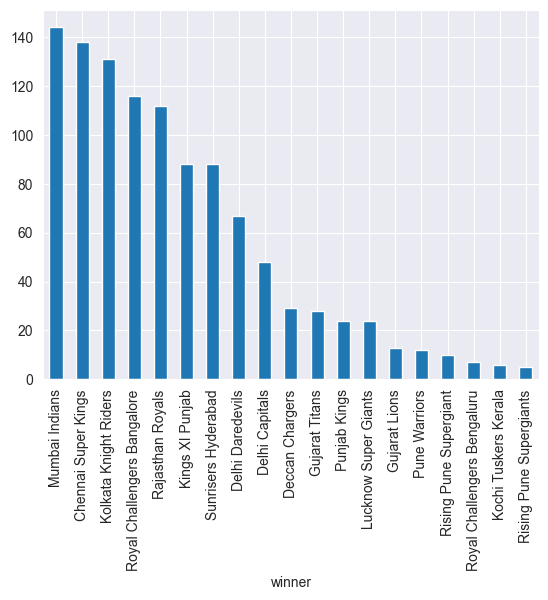

In [35]:
g
strong_team = matches['winner'].value_counts()
print(strong_team.head())
strong_team.plot(kind='bar')

batting_team
Mumbai Indians                 42176
Kolkata Knight Riders          39331
Chennai Super Kings            38629
Royal Challengers Bangalore    37692
Rajasthan Royals               34747
Name: total_runs, dtype: int64


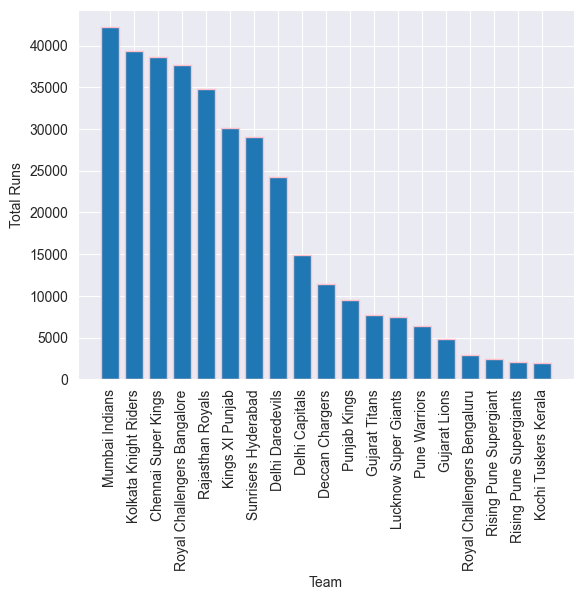

In [53]:
g aggressive_team = deliver.groupby('batting_team')['total_runs'].sum().sort_values(ascending=False)
print(aggressive_team.head())
plt.bar(aggressive_team.index , aggressive_team.values , align='center' , width = 0.75, edgecolor='pink')
plt.xticks(rotation=90)
plt.xlabel('Team')
plt.ylabel('Total Runs')

plt.show()


In [80]:
g deliver.shape
deliver.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,batsman_runs,extra_runs,total_runs,extras_type,is_wicket
6670,336010,1,Kolkata Knight Riders,Royal Challengers Bangalore,8,6,DJ Hussey,A Kumble,0,1,1,legbyes,1
9022,336020,1,Delhi Daredevils,Deccan Chargers,15,2,G Gambhir,PP Ojha,0,1,1,wides,1
21707,392217,2,Chennai Super Kings,Rajasthan Royals,16,6,ML Hayden,SK Warne,0,1,1,wides,1
21927,392218,2,Royal Challengers Bangalore,Mumbai Indians,13,2,RE van der Merwe,Harbhajan Singh,0,1,1,wides,1
22808,392222,1,Kings XI Punjab,Mumbai Indians,17,6,K Goel,SL Malinga,0,1,1,wides,1


<Axes: ylabel='player_of_match'>

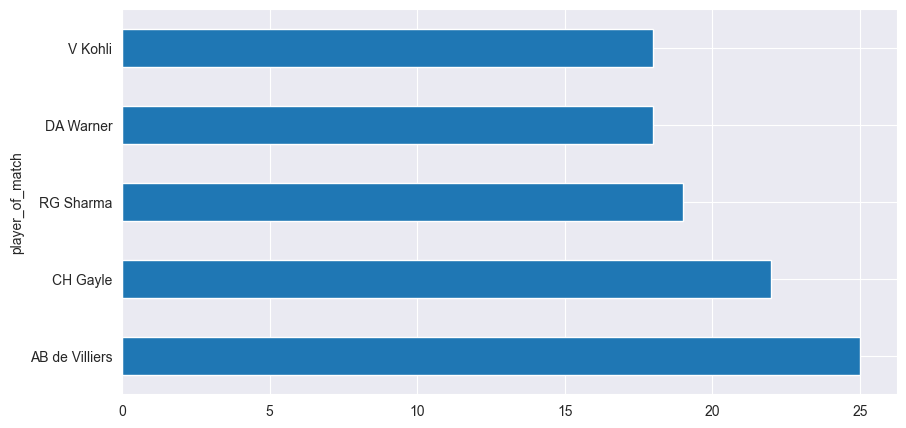

In [89]:
g most_mvp = matches['player_of_match'].value_counts()
most_mvp.head()
plt.figure(figsize = (10,5))
most_mvp.head().plot(kind='barh')


bowling_team
Mumbai Indians           12
Rajasthan Royals         10
Chennai Super Kings       5
Kolkata Knight Riders     5
Gujarat Titans            5
dtype: int64


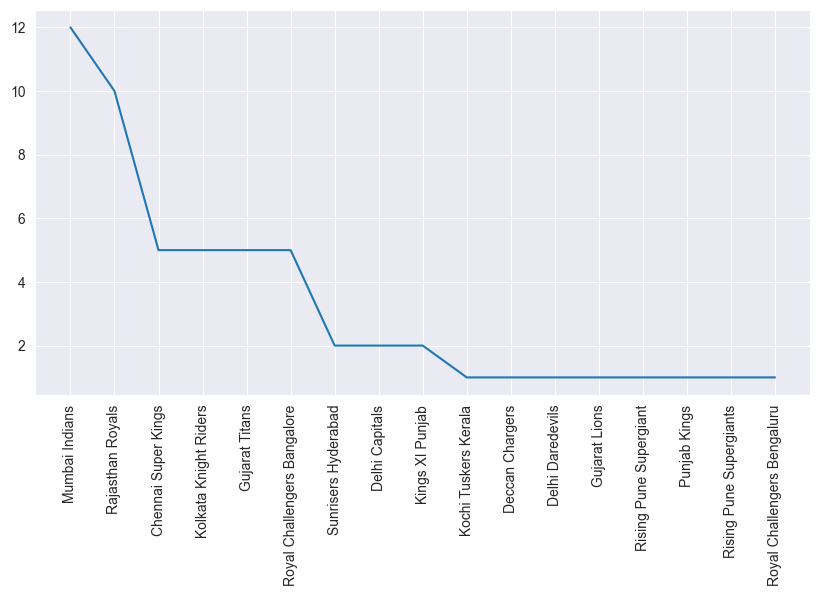

In [97]:
best_bowlingteam = (deliver[deliver["is_wicket"] == 1 ].groupby("bowling_team").size().sort_values(ascending=False))
print(best_bowlingteam.head())
plt.figure(figsize = (10,5))
plt.xticks(rotation=90)
plt.plot(best_bowlingteam)

                             total_runs  avg_runs  balls
batting_team                                            
Royal Challengers Bangalore           9     1.125      8
Kolkata Knight Riders                 8     1.000      8
Rajasthan Royals                      7     1.400      5
Mumbai Indians                        6     1.000      6
Chennai Super Kings                   6     1.000      6


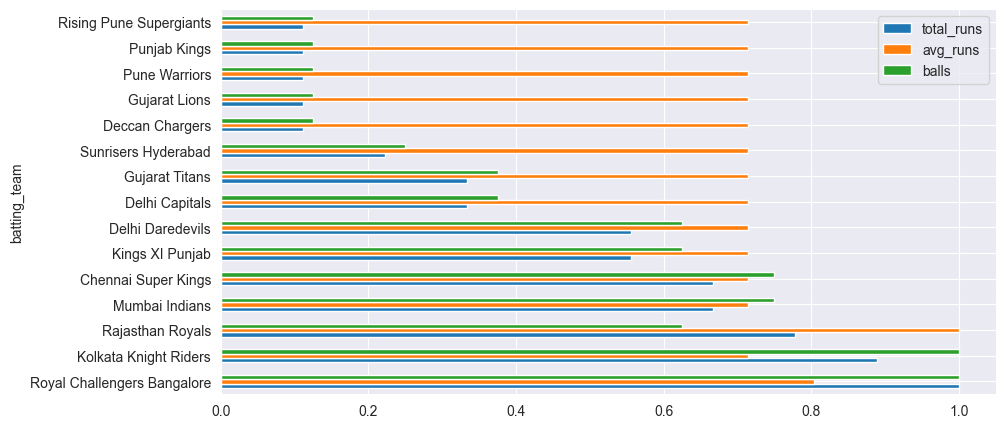

In [112]:
g pro_thing = deliver.groupby('batting_team').agg(
    total_runs=('total_runs', 'sum'),
    avg_runs=('total_runs', 'mean'),
    balls=('ball', 'count')
).sort_values(by='total_runs' , ascending=False)
print(pro_thing.head())
normalize = pro_thing/ pro_thing.max()
fig , ax = plt.subplots(figsize = (10,5))

normalize.plot(kind='barh' , ax=ax)


plt.show()

